<a href="https://colab.research.google.com/github/adrienpayong/educativecourse/blob/main/cotemplatematching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

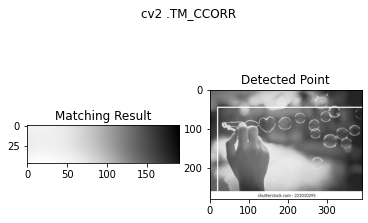

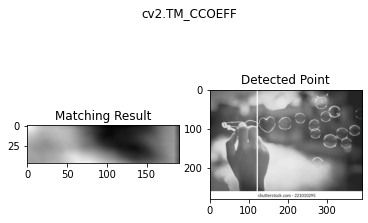

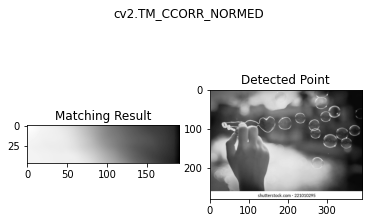

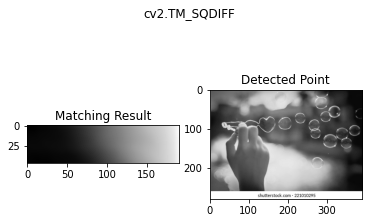

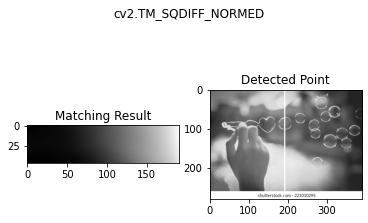

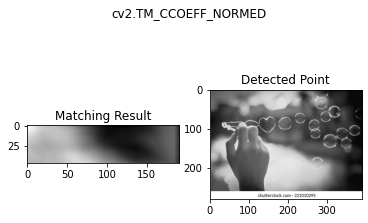

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

image1 = cv2.imread('test.jpg',0)
image2 = image1.copy()
templ = cv2.imread('test02.jpg',0)
width, height = templ.shape[::-1]
# A list of all six comparison techniques 
meth = ['cv2 .TM_CCORR','cv2.TM_CCOEFF',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED','cv2.TM_CCOEFF_NORMED']
for m in meth:
    image = image2.copy()
    method1 = eval(m)
    #template Matching application
    re = cv2.matchTemplate(image,templ,method1)
    mn_val, mx_val, mn_loc, mx_loc = cv2.minMaxLoc(re)
    # If the method is TM_CCOEFF or TM_SQDIFF, we take the minimum
    if method1 in [cv2.TM_CCOEFF, cv2.TM_SQDIFF]:
        tp_left = mn_loc
    else:
        tp_left = mx_loc
    bottom_r = (tp_left[0] + width, tp_left[1] + height)
    cv2.rectangle(image,tp_left, bottom_r, 255, 2)
    plt.subplot(121),plt.imshow(re,cmap = 'gray')
    plt.title('Matching Result')
    plt.subplot(122),plt.imshow(image,cmap = 'gray')
    plt.title('Detected Point')
    plt.suptitle(m)
    plt.show()